In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
#K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. 
#Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, 
#there will be two clusters, and for K=3, there will be three clusters, and so on.

In [27]:
df = pd.read_csv("College_Data.csv" )
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [61]:
def convert(private):
    if private == 'Yes':
        return 1
    else:
        return 0
    
df['Cluster'] = df['Private'].apply(convert)
df.head()


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [14]:
from sklearn.cluster import KMeans
X = df.drop(['Private' , 'Unnamed: 0']  , axis=1)

In [55]:
# we can determine it by using elbow method
km = KMeans(n_clusters=2)

In [56]:
km.fit(X)

KMeans(n_clusters=2)

In [57]:
predict = km.fit_predict(X)

In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(df['Cluster'] , predict))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



### Elbow Method

C:\Users\mohit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


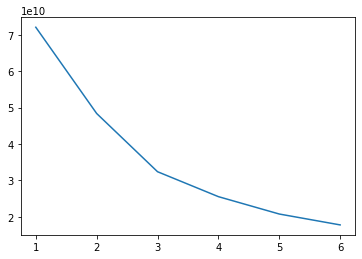

In [54]:

wscc = []
for i in range(1,7):
    km = KMeans(n_clusters=i)
    km.fit(X)
    predict_i = km.inertia_
    wscc.append(predict_i)
    
plt.plot(range(1,7) , wscc)
    